In [ ]:
# import pandas as pd
# from splinter import Browser
# from bs4 import BeautifulSoup
# from webdriver_manager.chrome import ChromeDriverManager

# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)

In [ ]:
# url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
# browser.visit(url)
# html = browser.html
# soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# table = soup.find("table", class_ = "table")
# table

In [ ]:
# rows = table.find_all("tr")
# rows

In [ ]:
# mars_temp = {}

In [ ]:
# for row in rows:
#     row_heading = row.find('th')
#     row_data = row.find('td')
#     mars_temp[row_heading] = row_data

In [1]:
import pandas as pd
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [2]:
mars_df = df[0]
print(mars_df)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [3]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [32]:
import datetime 

mars_df[["terrestrial_date"]] = mars_df[["terrestrial_date"]].apply(pd.to_datetime)

In [33]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [34]:
#how many months exist on Mars?
len(mars_df['month'].value_counts())

12

In [7]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
len(mars_df['terrestrial_date'].value_counts())

1867

In [106]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)?

mars_months = []

month_nums = [1,2,3,4,5,6,7,8,9,10,11,12]
for num in month_nums:
    mars_month_temps = mars_df[mars_df.month == num]['min_temp'].mean()
    mars_months.append(mars_month_temps)
    
mars_months

[-77.16091954022988,
 -79.93258426966293,
 -83.30729166666667,
 -82.74742268041237,
 -79.30872483221476,
 -75.29931972789116,
 -72.28169014084507,
 -68.38297872340425,
 -69.17164179104478,
 -71.98214285714286,
 -71.98550724637681,
 -74.45180722891567]

Text(0.5, 1.0, 'Average Temp by Mars Month')

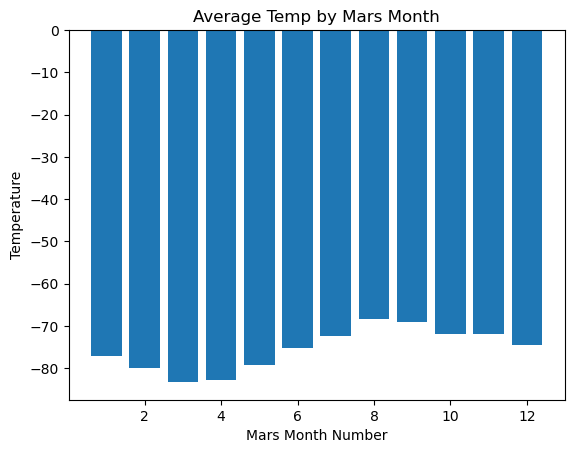

In [108]:
# Create the plot
plt.bar(month_nums, mars_months)
# Create labels for the x and y axes.
plt.xlabel("Mars Month Number")
plt.ylabel("Temperature")
# Create a title.
plt.title("Average Temp by Mars Month")

In [23]:
#Which months have the lowest and the highest atmospheric pressure on Mars?

mars_months_pressures = []

month_nums = [1,2,3,4,5,6,7,8,9,10,11,12]
for num in month_nums:
    mars_month_pressure = mars_df[mars_df.month == num]['pressure'].mean()
    mars_months_pressures.append(mars_month_pressure)
    
mars_months_pressures

[862.4885057471264,
 889.4550561797753,
 877.3229166666666,
 806.3298969072165,
 748.5570469798657,
 745.0544217687075,
 795.1056338028169,
 873.8297872340426,
 913.3059701492538,
 887.3125,
 857.0144927536232,
 842.156626506024]

Text(0.5, 1.0, 'Average Pressure by Mars Month')

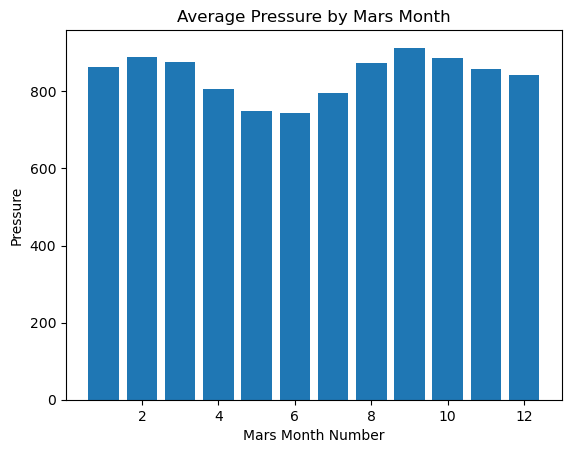

In [104]:
import matplotlib.pyplot as plt

# Create the plot
plt.bar(month_nums, mars_months_pressures)
# Create labels for the x and y axes.
plt.xlabel("Mars Month Number")
plt.ylabel("Pressure")
# Create a title.
plt.title("Average Pressure by Mars Month")


In [59]:
mars_df['terrestrial_date']= mars_df['terrestrial_date'].astype(str)
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [69]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#import re
#earth_2013_df = mars_df['terrestrial_date'].str.findall(r'(2013\S{5,})')
#earth_2013_df = pd.DataFrame(data = earth_2013_df)
#earth_2013_df = earth_2013_df[earth_2013_df['terrestrial_date'].str.len()>0]
#earth_2013_df

,terrestrial_date
130,[2013-01-01]
131,[2013-01-02]
132,[2013-01-03]
133,[2013-01-04]
134,[2013-01-05]
...,...
415,[2013-12-27]
416,[2013-12-28]
417,[2013-12-29]
418,[2013-12-30]


In [99]:
mars_2013 = mars_df[mars_df.terrestrial_date.str.startswith('2013')]
mars_2013_nodupes = mars_2013.drop_duplicates(subset= ['terrestrial_date','sol'], keep='first', inplace=False, ignore_index=False)

mars_2013_nodupes

,id,terrestrial_date,sol,ls,month,min_temp,pressure
130,51,2013-01-01,144,235,8,-64.0,907.0
131,52,2013-01-02,145,236,8,-64.0,909.0
132,53,2013-01-03,146,237,8,-65.0,908.0
133,54,2013-01-04,147,237,8,-65.0,914.0
134,55,2013-01-05,148,238,8,-65.0,912.0
135,56,2013-01-06,149,239,8,-65.0,914.0
136,58,2013-01-07,150,239,8,-64.0,913.0
137,59,2013-01-08,151,240,9,-65.0,915.0
138,60,2013-01-09,152,241,9,-63.0,914.0
139,61,2013-01-10,153,241,9,-65.0,915.0


In [98]:
#About how many terrestrial (Earth) days exist in a Martian year? 
len(mars_2013_nodupes['sol'].value_counts())

290

In [109]:
#Export the DataFrame to a CSV file.
output_data_file = '/Users/scallina/Desktop/Bootcamp/10-1 Web Scraping/Mission_to_Mars/Mars_data.csv'
# Export the City_Data into a CSV.
mars_df.to_csv(output_data_file)